In [20]:
# Import essential libraries
import numpy as np
import json
import os
import pickle
import sys
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "experiment.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

In [8]:
with open(file_path, 'r') as f:
    data = json.load(f)

In [16]:
data.keys()

dict_keys(['Name', 'UMAPDistances', 'AverageUMAPDistance', 'RealDistances', 'AverageRealDistance', 'RandomDistances', 'AverageRandomDistance'])

In [39]:
combined_random_dist = [item for sublist in data['RandomDistances'] for item in sublist]

In [53]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def Average(lst):
    return sum(lst) / len(lst)

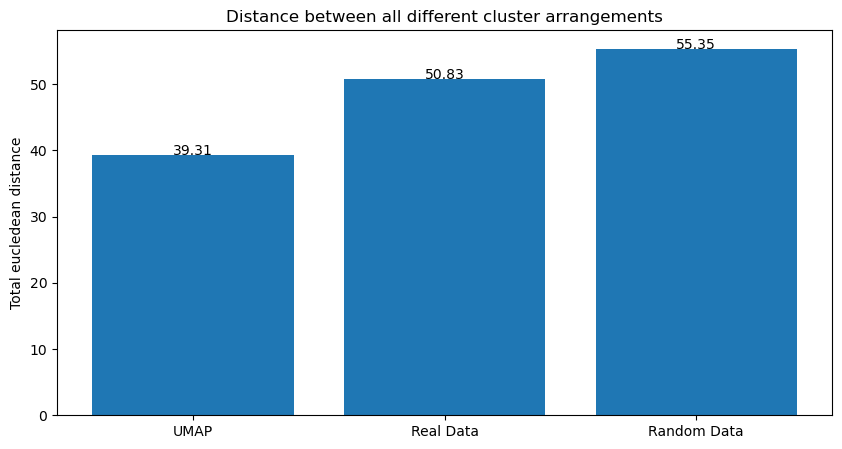

In [56]:
plt.figure(figsize = (10, 5))

name = ["UMAP", "Real Data", "Random Data"]
vals = [round(data["AverageUMAPDistance"],2), round(data["AverageRealDistance"],2), round(Average(data["AverageRandomDistance"]), 2)]


plt.bar(name, vals)
addlabels(name, vals)

plt.title('Distance between all different cluster arrangements')

plt.ylabel('Total eucledean distance')
#plt.xlabel('Data Origin')

plt.show()

/var/folders/_b/s54cb5212b3gmft7v5cqy2p40000gn/T/ipykernel_73828/3368694242.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(names)


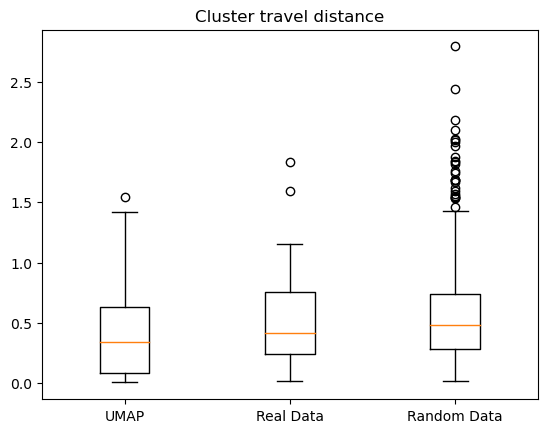

In [40]:
fig1, ax1 = plt.subplots()
names = ["UMAP", "Real Data", "Random Data"]
ax1.set_title('Cluster travel distance')
ax1.set_xticklabels(names)
ax1.boxplot([data["UMAPDistances"], data["RealDistances"], combined_random_dist])

plt.show()

In [57]:
# Defining JSON File path
unity_path = "~/MARKUS/Assets/Experiments/"
file_name = "cluster_distances_multiple_umap_runs.json"
file_path = unity_path + file_name
file_path = os.path.expanduser(file_path)

with open(file_path, 'r') as f:
    data2 = json.load(f)

In [77]:
umap_total_distances = [item["TotalUMAPDistance"] for item in data2]
real_total_distances = [item["TotalRealDistance"] for item in data2]
random_avg_total_distances = [Average(item["TotalRandomDistance"]) for item in data2]

/var/folders/_b/s54cb5212b3gmft7v5cqy2p40000gn/T/ipykernel_73828/2526587363.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(names)


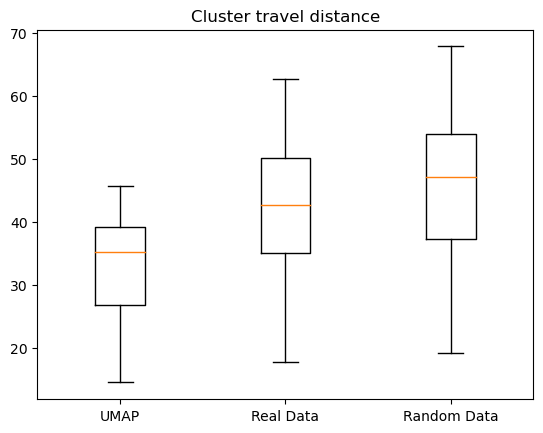

In [88]:
fig2, ax2 = plt.subplots()
names = ["UMAP", "Real Data", "Random Data"]
ax2.set_title('Cluster travel distance')
ax2.set_xticklabels(names)
ax2.boxplot([umap_total_distances, real_total_distances, random_avg_total_distances])

plt.show()

<AxesSubplot:>

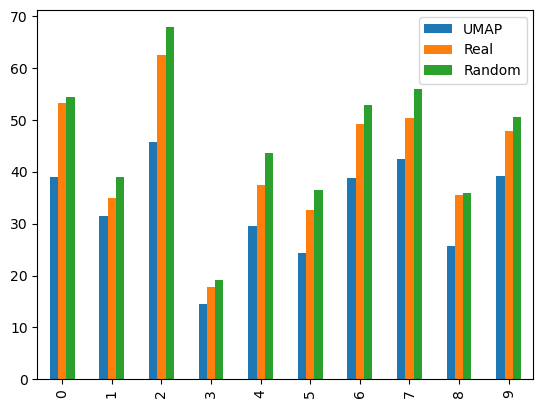

In [91]:
#Add visualization for each UMAP Run
df=pd.DataFrame({'UMAP':umap_total_distances, 'Real':real_total_distances, 'Random':random_avg_total_distances})
df.plot(kind='bar', stacked=False)